In [ ]:
###import the libraries
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Read the dataset
df =pd.read_csv('/content/drive/MyDrive/GlobalSuperstoreData.csv/GlobalSuperstoreData.csv')

It is a very good practise to perform all the necessary operations in the duplicate of the original dataset

In [ ]:
retail=df.copy()
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [ ]:
retail.shape

(51290, 5)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [ ]:
retail['market_segment'] = retail['Market'] +'_' + retail['Segment']

In [ ]:
retail.head()

,Order Date,Segment,Market,Sales,Profit,market_segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


nunique is a method in function used to find the unique values in a column

In [ ]:
retail.nunique().sort_values()

Segment               3
Market                7
market_segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

In [ ]:
retail['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [ ]:
11002+10294+10000+9994+5029+4587+384

51290

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


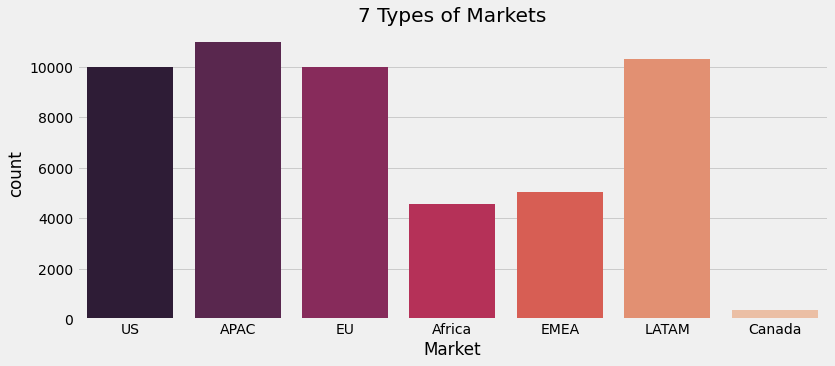

In [ ]:
plt.figure(figsize=(12,5))
print(retail['Market'].value_counts())
sns.countplot(retail['Market'],palette='rocket')
plt.title("7 Types of Markets")
plt.show()

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: market_segment, dtype: int64


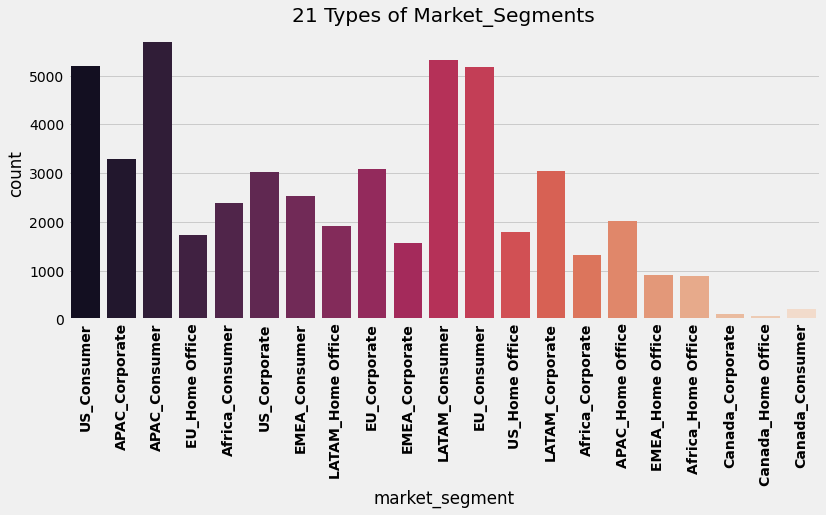

In [ ]:
plt.figure(figsize=(12,5))
print(retail['market_segment'].value_counts())
sns.countplot(retail['market_segment'],palette='rocket')
plt.title("21 Types of Market_Segments")
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


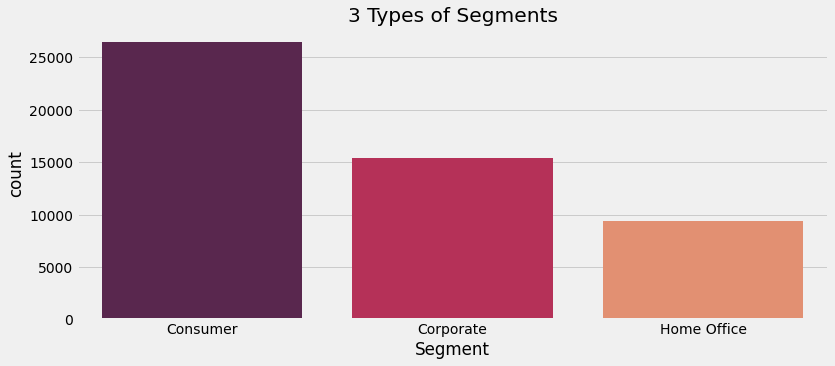

In [ ]:
plt.figure(figsize=(12,5))
print(retail['Segment'].value_counts())
sns.countplot(retail['Segment'],palette='rocket')
plt.title('3 Types of Segments')
plt.show()

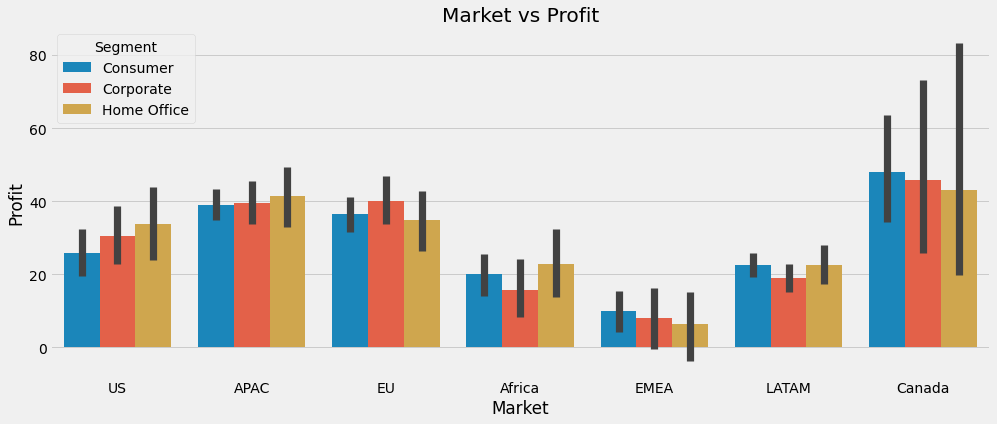

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Market",y="Profit",hue="Segment",data=retail)
plt.title("Market vs Profit")
plt.show()

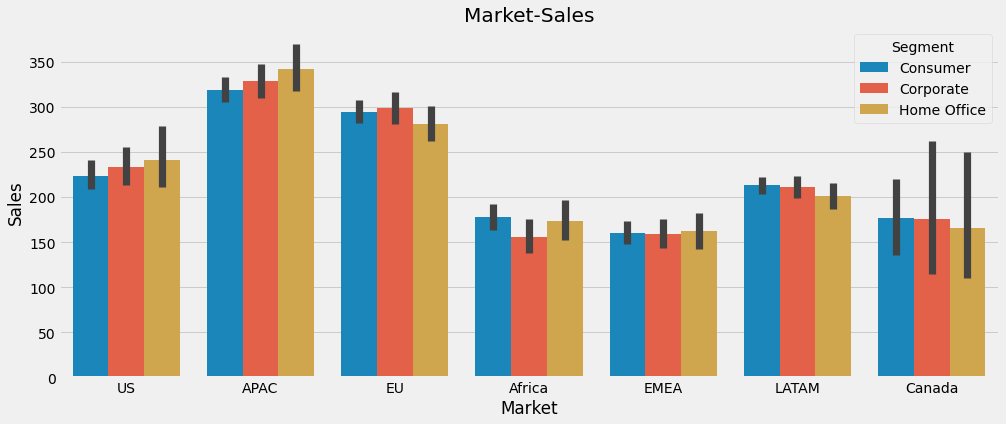

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=retail['Market'],y=retail["Sales"],hue=retail["Segment"])
plt.title("Market-Sales")
plt.show()

In [ ]:
retail.drop(['Market','Segment'],axis=1,inplace=True)

In [ ]:
retail.head()

,Order Date,Sales,Profit,market_segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [ ]:
###Converitng all the yyyy-mm-dd to yyyy-mm
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period("m")

In [ ]:
retail= retail.sort_values(by=['Order Date'])

In [ ]:
retail.head()

,Order Date,Sales,Profit,market_segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [ ]:
retail_profit=retail.pivot_table(index='Order Date',values="Profit",columns="market_segment",aggfunc="sum")

In [ ]:
retail_profit.head()

market_segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,EMEA_Corporate,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,555.426,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,1067.562,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,698.502,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,178.314,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,964.140,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [ ]:
retail_profit.shape

(48, 21)

In [ ]:
size=42
train=retail_profit[0:size]
test=retail_profit[size:]

In [ ]:
train.shape

(42, 21)

In [ ]:
mean = np.mean(train)
std=np.std(train)

cov_df = pd.DataFrame(mean)
cov_df['std'] = std
cov_df['COV'] = std/mean
cov_df.columns= [ 'Mean', 'Std', 'CoV']
cov_df.sort_values(by="CoV")
cov_df

,Mean,Std,CoV
market_segment,,,
APAC_Consumer,4400.894243,2300.457687,0.522725
APAC_Corporate,2574.919807,1364.837734,0.530051
APAC_Home Office,1511.088314,1523.508658,1.008219
Africa_Consumer,957.707000,1254.932072,1.310351
Africa_Corporate,412.617571,780.566850,1.891744
Africa_Home Office,377.221071,759.322203,2.012937
Canada_Consumer,225.987632,282.555788,1.250315
Canada_Corporate,90.980294,162.493114,1.786025
Canada_Home Office,118.003750,279.632866,2.369695


In [ ]:
cov_df

,Mean,Std,CoV
market_segment,,,
APAC_Consumer,4400.894243,2300.457687,0.522725
APAC_Corporate,2574.919807,1364.837734,0.530051
APAC_Home Office,1511.088314,1523.508658,1.008219
Africa_Consumer,957.707000,1254.932072,1.310351
Africa_Corporate,412.617571,780.566850,1.891744
Africa_Home Office,377.221071,759.322203,2.012937
Canada_Consumer,225.987632,282.555788,1.250315
Canada_Corporate,90.980294,162.493114,1.786025
Canada_Home Office,118.003750,279.632866,2.369695


In [ ]:
retail['Order Date'] = retail['Order Date'].astype(str)
retail['Order Date']=pd.to_datetime(retail['Order Date'])

In [ ]:
retail.head()

,Order Date,Sales,Profit,market_segment
15262,2011-01-01,139.65,15.30,EU_Corporate
26744,2011-01-01,88.44,15.84,EU_Consumer
48614,2011-01-01,11.43,4.11,EU_Corporate
9417,2011-01-01,491.00,122.70,LATAM_Consumer
48590,2011-01-01,4.71,0.00,US_Home Office


In [ ]:
retail_df= retail[retail['market_segment']=="APAC_Consumer"]

In [ ]:
retail_df.head()

,Order Date,Sales,Profit,market_segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [ ]:
data=pd.DataFrame(retail_df.groupby('Order Date').sum())

In [ ]:
data.head()

,Sales,Profit
Order Date,,
2011-01-01,18821.9898,2254.4898
2011-02-01,23313.3531,4627.8531
2011-03-01,26518.4919,2337.8319
2011-04-01,12046.0923,633.6423
2011-05-01,25941.9000,3838.9500


In [ ]:
data.drop('Profit',axis=1,inplace=True)

In [ ]:
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


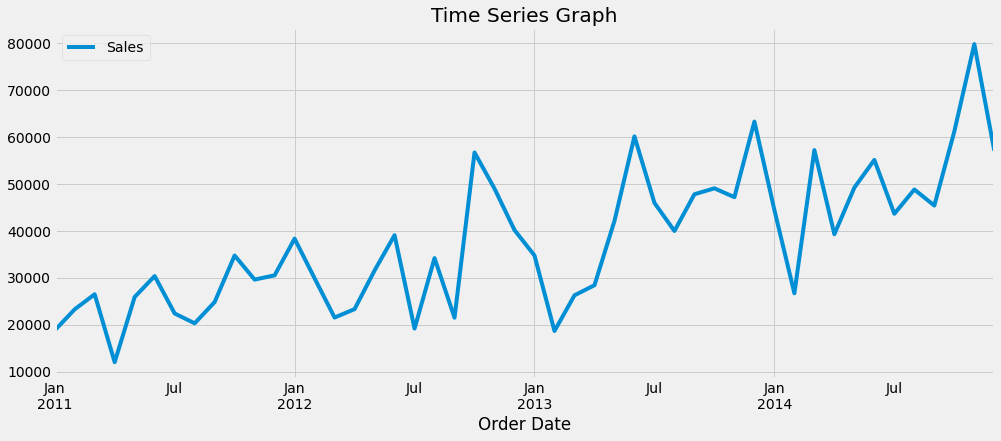

In [ ]:
data.plot(figsize=(15,6))
plt.title("Time Series Graph")
plt.legend(loc='best')
plt.show()

In [ ]:
data.isnull().sum()

Sales    0
dtype: int64

In [ ]:
size=42
train=data[:size]
test=data[size:]

In [ ]:
train.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


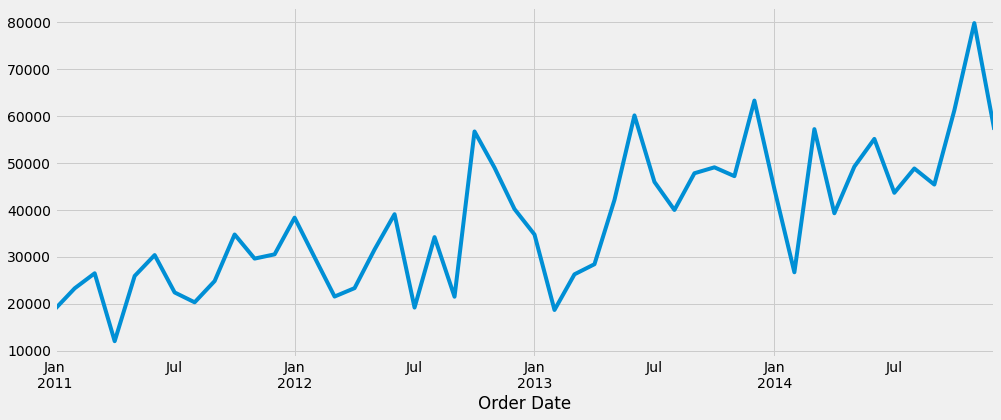

In [ ]:
plt.figure(figsize=(15,6))
data['Sales'].plot()

There are two steps to check weather the time series data is Statinary or no.If it is stationary ALRIGHTY! ,else we have to make it stationary 
To check the Stationarity 
1.adfuller test
2.kpss test

1. In adfuller test we should get the p value less than 0.05
2.KPSS test is quite opposite to this(p>0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_test = adfuller(data['Sales'])

In [ ]:
print("p value is :",adf_test[1])

p value is : 0.011803859657119754


In [ ]:
from statsmodels.tsa.stattools import kpss

kpss_test=kpss(data['Sales'])
print("p value here is ",kpss_test[1])

p value here is  0.024720321345854595


Therefore our data is not stationary ,we have to make it stationary now!
Following these two steps will make the data stationary.

1. BOXCOX
2. DIFFERENCE

A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape.

The differene of the previous term to the current term completes the step

 Hence the data is stationary

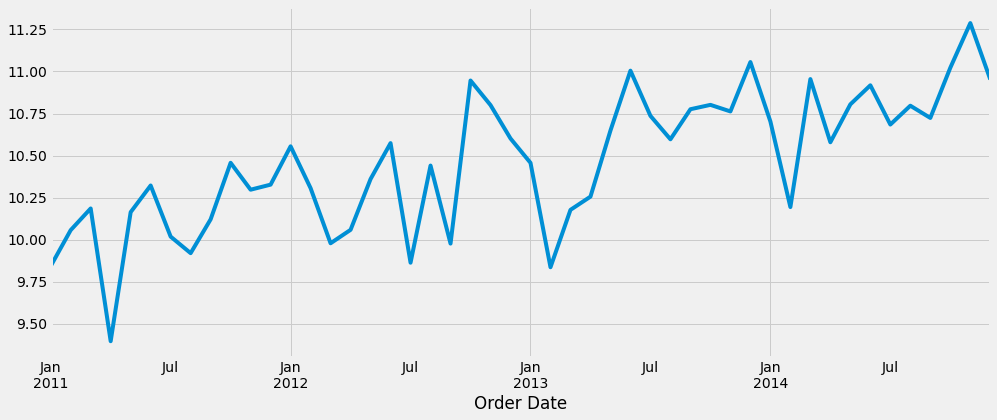

In [ ]:
from scipy.stats import boxcox

data_bx = pd.Series(boxcox(data['Sales'],lmbda=0),index=data.index)                         

plt.figure(figsize=(15,6))
data_bx.plot()

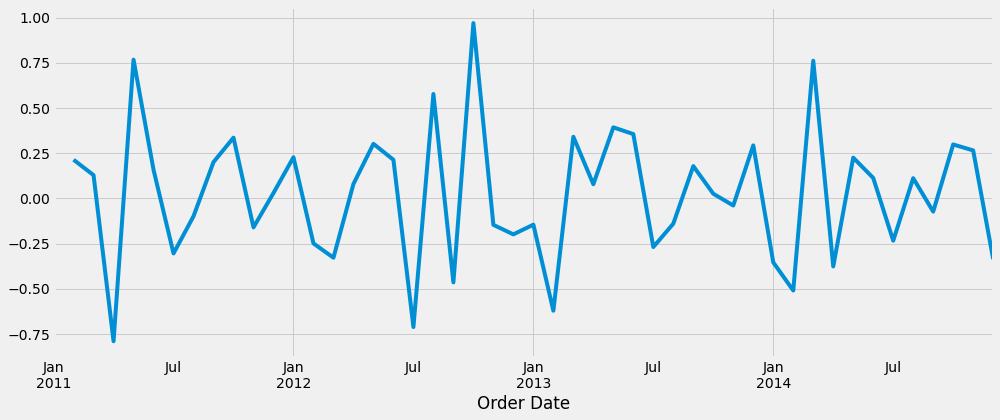

In [ ]:
data_diff= pd.Series(data_bx - data_bx.shift(),data.index)

plt.figure(figsize=(15,6))
data_diff.plot()

To perform the adfuller and kpss test pur data should have no null values

In [ ]:
data_diff.dropna(inplace=True)

In [ ]:
ad_test2 = adfuller(data_diff)
print("p value :",ad_test2[1])

p value : 0.00016989676321143055


In [ ]:
kptest2 = kpss(data_diff)
print("p value is :",kptest2[1])

p value is : 0.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


HURRY!!
Data is stationary now



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

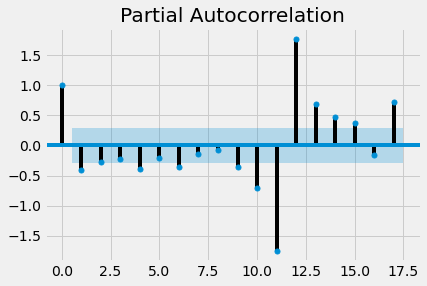

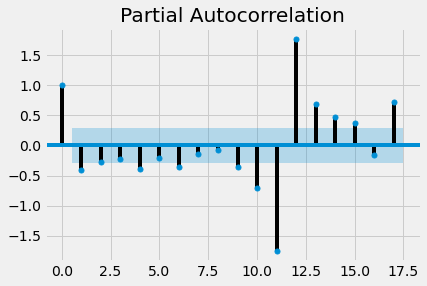

In [ ]:
plot_pacf(data_diff)

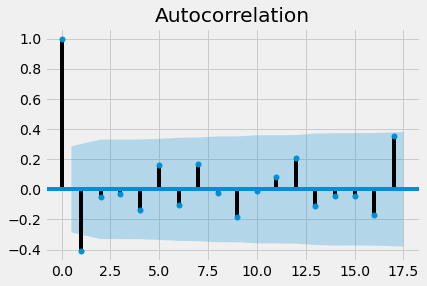

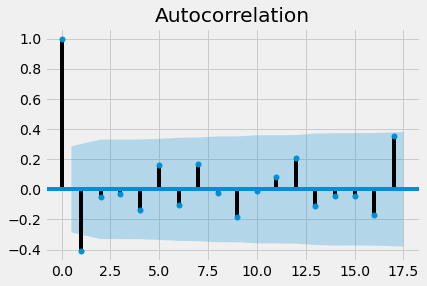

In [ ]:
plot_acf(data_diff)

In [ ]:
### using ARIMA model to forecaste the data 
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ar_model = ARIMA(data_diff,order=(1,0,0))
model = ar_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
data_diff.head()

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
dtype: float64

In [ ]:
y_ar= data_diff.copy()

Time series data forecastes all the values from the starting date to the ending date.

In [ ]:
y_ar['forecasted'] =model.predict(data_diff.index.min(),data_diff.index.max())

In [ ]:
### Getting back the originals
y_ar['forecasted'] = y_ar['forecasted'].cumsum()
y_ar['forecasted'] = y_ar['forecasted'].add(data_bx[0])
y_ar['forecasted'] = np.exp(y_ar['forecasted'])

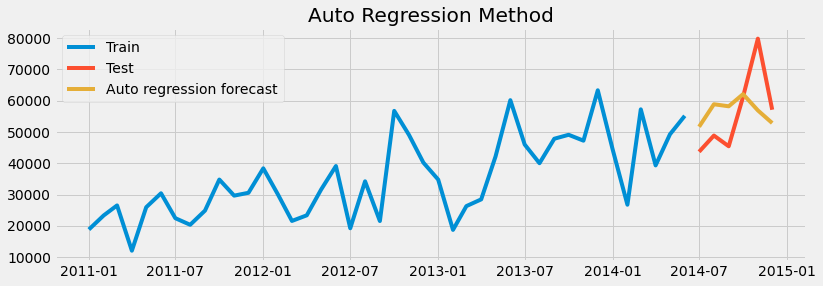

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_ar['forecasted'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse= mean_squared_error(test['Sales'],y_ar['forecasted'][test.index.min():])

In [ ]:
mse=np.sqrt(mse)

In [ ]:
mse

12059.681878532352

In [ ]:
mape = np.round(np.mean(np.abs(test['Sales']-y_ar['forecasted'][test.index.min():])/test['Sales'])*100,2)

In [ ]:
mape

17.42

This is a basic data analytics Project. Gives an understanding about the real world data analytics